## Validation of Cooling Lib
This notebook will build the multi-layer structure described in Raman $et$ $al.$, Nature 515, 540-546 (2014), compute plot its emissivity in the solar region and in the atmospheric transmissivity region of the spectrum (~300-2500 nm for the former, 2500-20000 nm for the latter), and compute the cooling power for several different differences between the temperature of the structure and the ambient temperature.  


In [1]:
### Import WPTHERML class!
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib

### Define structure!

structure = {

        'Material_List': ['Air', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'Ag', 'Air'],
        'Thickness_List': [0, 230e-9, 485e-9, 688e-9, 13e-9, 73e-9, 34e-9, 54e-9, 200e-9, 0],
        'Lambda_List': [300e-9, 60000e-9, 5000],
        'EXPLICIT_ANGLE': 1,
        'COOLING': 1
     
        }

### create instance of multilayer class - results will be computed and printed automiatically
w_slab = multilayer(structure)




 Temperature not specified!
 Proceeding with default T = 300 K
69.70430047224701  W/m^2 (Total Cooling Power)
129.20918487262873  W/m^2 ((Cooling) Power radiated by structure at  300 K)
18.268834884651092  W/m^2 ((Warming) Power absorbed from sun)
41.23604951573062  W/m^2 ((Warming) Power absorbed from atmospheric radiation at  300 K)


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### Validate Power Radiated Against Stefan-Boltzmann law

In [2]:

### now make structure a blackbody emitter at all angles
w_slab.step_emissivity_ea(20000e-9,80000e-9)
### This is only normal emissivity in case you want to plot it!
w_slab.step_emissivity(20000e-9,80000e-9)
### re-compute thermal emission spectra at each angle
w_slab.thermal_emission_ea()
### re-compute cooling power
w_slab.cooling_power()




sig = 5.670367e-8
### plot results assuming blackbody emissivity
print("Radiative Power (cooling) is ",w_slab.radiative_power_val, "W/m^2")
print("Stefan-Boltzmann Law is ",w_slab.T_ml**4*sig, "W/m^2")


Radiative Power (cooling) is  450.4891874450115 W/m^2
Stefan-Boltzmann Law is  459.29972699999996 W/m^2


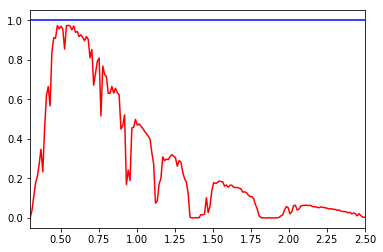

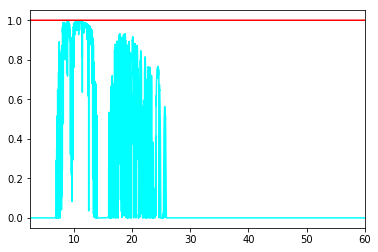

In [3]:
### get AM1.5 spectra and transmissivity data
AM = datalib.AM(w_slab.lambda_array)
T_atm = datalib.ATData(w_slab.lambda_array)
### plot results of perfect emissivity!
plt.plot(w_slab.lambda_array*1e6, w_slab.emissivity_array, 'blue')
plt.plot(w_slab.lambda_array*1e6, AM/(1.4*1e9), 'red')
plt.xlim(0.3,2.5)
plt.show()


plt.plot(w_slab.lambda_array*1e6, T_atm, 'cyan', label='Atmospheric Transparency')
plt.plot(w_slab.lambda_array*1e6, w_slab.emissivity_array, 'red', label='Emissivity')
#plt.plot(w_slab.lambda_array*1e6, BB, 'black')
plt.xlim(2.5,60)
plt.show()